In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples = 30, n_features = 2,
                           n_informative = 2, n_redundant = 0,
                           n_clusters_per_class = 1, n_classes = 3, random_state = 123)

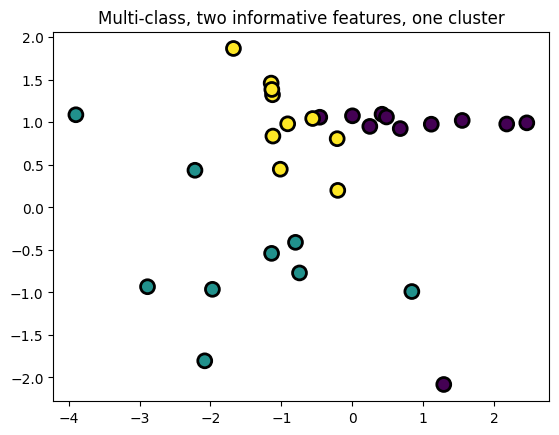

In [4]:
plt.title("Multi-class, two informative features, one cluster")
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 100, edgecolor = 'k', linewidth = 2)
plt.show()

make_classification 파라터터
• n samples : 표본 데이터의 수, 디폴트 100
• n_features : 독립 변수의 수, 디폴트 20
• n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
• n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
• n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
• n classes : 종속 변수의 클래스 수, 디폴트 2
• n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
• weights : 각 클래스에 할당된 표본 수
• random_state : 난수 발생 시드
반환값
• X : (nsamples, n_features] 크기의 배열. 독립 변수
• y: [n_samples] 크기의 배열. 종속 변수

In [15]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = "random")
model.fit(X)

KMeans(init='random', n_clusters=3)

In [16]:
model.cluster_centers_

array([[-1.96728067, -0.48772003],
       [ 1.44565173,  0.2610318 ],
       [-0.55984665,  1.04057827]])

In [17]:
pred = model.predict(X)
pred

array([1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1,
       2, 2, 2, 0, 1, 2, 2, 2])

In [21]:
def plot_clusters(model, data):
    c0, c1, c2 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], s = 100, marker = 'v', c = 'r')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], s = 100, marker = '^', c = 'b')
    plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], s = 100, marker = 'v', c = 'y')
    
    plt.scatter(c0[0], c0[1], s = 200, c = 'r')
    plt.scatter(c1[0], c1[1], s = 200, c = 'b')
    plt.scatter(c2[0], c2[1], s = 200, c = 'y')
    plt.show()

In [20]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
                np.hstack([X,
                            np.linalg.norm(X - c0, axis = 1)[:, np.newaxis], # ord = 1 : L1-norm
                            np.linalg.norm(X - c1, axis = 1)[:, np.newaxis], # ord = 2 : L2-norm(default)
                            np.linalg.norm(X - c2, axis = 1)[:, np.newaxis], # 
                            model.labels_[:, np.newaxis]]),
                 columns = ["x0", "x1", "d0", "d1", "d2", "class"]
                 )

df

,x0,x1,d0,d1,d2,class
0,1.291320,-2.083269,3.628258,2.349375,3.631148,1.0
1,0.677549,0.926385,2.999136,1.016207,1.242654,1.0
2,0.248341,0.952078,2.642347,1.382425,0.813018,2.0
3,-2.218453,0.436127,0.957383,3.668286,1.765315,0.0
4,-3.898155,1.089007,2.492858,5.407570,3.338659,0.0
5,-2.080478,-1.805009,1.322144,4.086822,3.226405,0.0
6,1.115515,0.977966,3.413483,0.789294,1.676531,1.0
7,-0.203825,0.199599,1.892666,1.650621,0.913234,2.0
8,0.420718,1.095145,2.864960,1.321451,0.982081,2.0
9,-0.457603,1.059832,2.161954,2.064089,0.104040,2.0


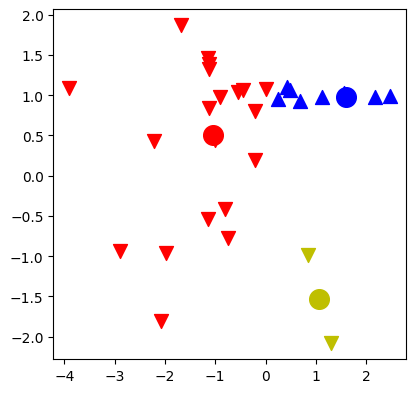

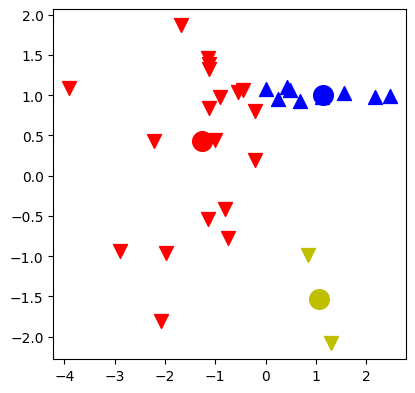

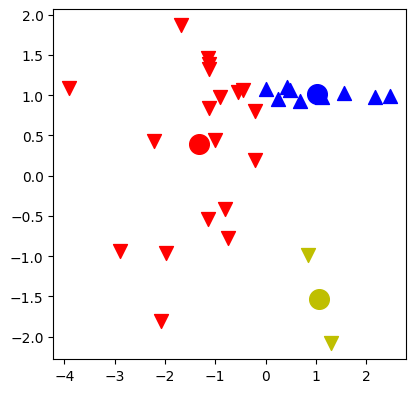

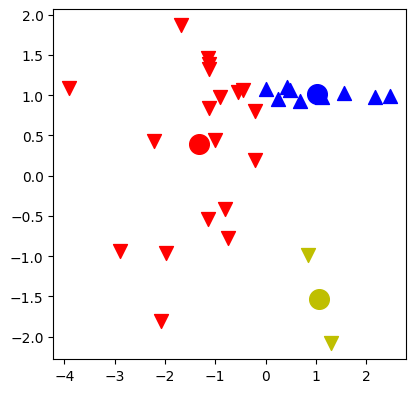

In [33]:
plt.figure(figsize=(10,10))

model1 = KMeans(n_clusters = 3, init = 'random', n_init = 1, max_iter = 1, random_state = 1)
model1.fit(X)
plt.subplot(2, 2, 1)
plt.plot(0, 0)
plot_clusters(model1, X)

plt.figure(figsize=(10,10))
model2 = KMeans(n_clusters = 3, init = 'random', n_init = 1, max_iter = 2, random_state = 1)
model2.fit(X)
plt.subplot(2, 2, 2)
plt.plot(0, 1)
plot_clusters(model2, X)

plt.figure(figsize=(10,10))
model3 = KMeans(n_clusters = 3, init = 'random', n_init = 1, max_iter = 3, random_state = 1)
model3.fit(X)
plt.subplot(2, 2, 3)
plt.plot(1, 0)
plot_clusters(model3, X)

plt.figure(figsize=(10,10))
model4 = KMeans(n_clusters = 3, init = 'random', n_init = 1, max_iter = 4, random_state = 1)
model4.fit(X)
plt.subplot(2, 2, 4)
plt.plot(1, 1)
plot_clusters(model4, X)

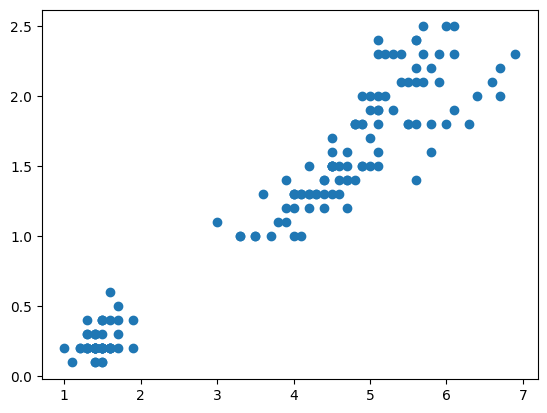

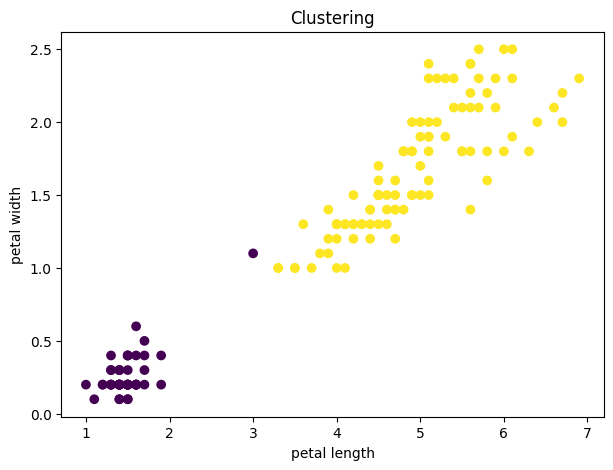

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

iris_data_pd = sns.load_dataset("iris")

# Matplotlib 라이브러리의 pyplot 모듈을 plt로 불러옵니다.
import matplotlib.pyplot as plt

# Iris 데이터에서 petal length와 petal width를 DataFrame으로 변환합니다.
# 이 DataFrame의 컬럼은 'petal length (cm)', 'petal width (cm)'로 설정됩니다.
petals = pd.DataFrame(iris_data_pd.values[:, 2:4], columns=['petal length (cm)', 'petal width (cm)'])

# petal length와 petal width 값을 산점도로 시각화합니다.
plt.scatter(petals.values[:, 0], petals.values[:, 1])
plt.show()

# sklearn 라이브러리에서 KMeans 클러스터링 모델을 가져옵니다.
from sklearn.cluster import KMeans

# 클러스터 개수를 2로 설정하고, 난수 초기값을 20으로 고정한 KMeans 객체를 생성합니다.
km = KMeans(n_clusters=2, random_state=20)

# Iris 데이터의 petal length와 petal width(2~4번째 열)을 사용하여 KMeans 모델을 학습합니다.
km.fit(iris_data_pd.iloc[:, 2:4])

# 학습된 모델을 사용해 petal length와 petal width 데이터에 대해 클러스터를 예측합니다.
y_pred = km.predict(iris_data_pd.iloc[:, 2:4])

# 산점도의 크기를 설정합니다.
plt.figure(figsize=(7,5))

# 클러스터 결과를 색상으로 구분해 petal length와 petal width를 시각화합니다.
plt.scatter(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], c=y_pred)

# 그래프의 제목을 'Clustering'으로 설정합니다.
plt.title('Clustering')

# X축 레이블을 'petal length'로 설정합니다.
plt.xlabel('petal length')

# Y축 레이블을 'petal width'로 설정합니다.
plt.ylabel('petal width')

# 그래프를 출력합니다.
plt.show()

In [36]:
pred = km.predict(iris_data_pd.iloc[:, 2:4])

In [38]:
km.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [43]:
import math
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    squared = dx**2 + dy**2
    result  = math.sqrt(squared)
    return result

In [45]:
print("0 cluster dist : ", distance(iris_data_pd.iloc[98, 2],
                                   iris_data_pd.iloc[98, 3], km.cluster_centers_[0][0], km.cluster_centers_[0][1]))

print("1 cluster dist : ", distance(iris_data_pd.iloc[98, 2],
                                   iris_data_pd.iloc[98, 3], km.cluster_centers_[1][0], km.cluster_centers_[1][1]))


0 cluster dist :  1.7246990164733285
1 cluster dist :  2.0112458036464465
